<a href="https://colab.research.google.com/github/kf-rahman/UW-stat_courses/blob/main/stat443_a3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# List of required packages
required_packages <- c("forecast", "ggplot2")

# Function to check and install required packages
install_if_missing <- function(packages) {
  for (package in packages) {
    if (!require(package, character.only = TRUE)) {
      install.packages(package, dependencies = TRUE)
      library(package, character.only = TRUE)
    }
  }
}

# Install missing packages
install_if_missing(required_packages)



### Simulation Problem





### 1 a)

[1] "MSE AR1: 0.0198967160335313"
[1] "MSE MA1: 1.70245350040395"
[1] "MSE ARMA11: 1.70245350040395"


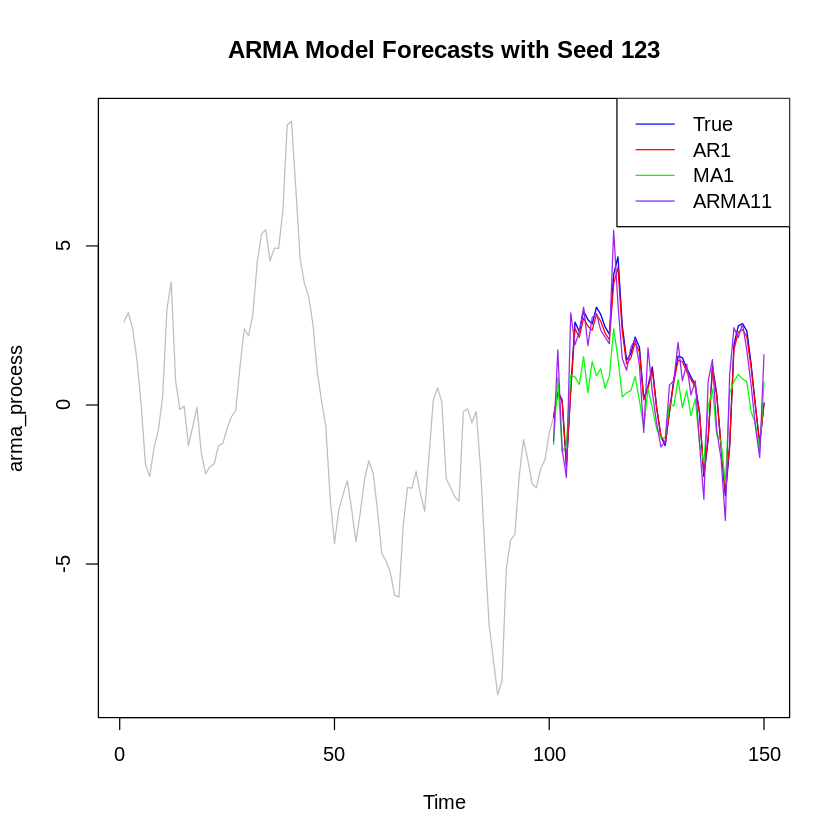

In [3]:
# Function to simulate and forecast using ARMA models
perform_analysis <- function(seed) {
  set.seed(seed)

  # Simulate ARMA(1,1) process
  phi <- 0.9
  theta <- 0.8
  n <- 150
  arma_process <- arima.sim(n = n, model = list(ar = phi, ma = theta))

  data_train <- arma_process[1:100]
  ar1_model <- Arima(data_train, order = c(1, 0, 0))
  ma1_model <- Arima(data_train, order = c(0, 0, 1))
  arma11_model <- Arima(data_train, order = c(1, 0, 1))

  predictions <- data.frame(Time = 101:150, AR1 = NA, MA1 = NA, ARMA11 = NA,
  True = arma_process[101:150])

  for (t in 101:150) {
    data_subset <- arma_process[1:t]

    updated_ar1 <- Arima(data_subset, model = ar1_model)
    updated_ma1 <- Arima(data_subset, model = ma1_model)
    updated_arma11 <- Arima(data_subset, model = arma11_model)

    predictions$AR1[t - 100] <- forecast(updated_ar1, h = 1)$mean
    predictions$MA1[t - 100] <- forecast(updated_ma1, h = 1)$mean
    predictions$ARMA11[t - 100] <- forecast(updated_arma11, h = 1)$mean
  }

  # Predictions
  AR1_pred<-predictions$AR1
  pred_True<-predictions$True
  MA1_pred<-predictions$MA1
  ARMA11_pred<-predictions$ARMA11



  # Calculate mean squared errors
  mse_ar1 <- mean((AR1_pred - pred_True)^2)
  mse_ma1 <- mean((MA1_pred - pred_True)^2)
  mse_arma11 <- mean((ARMA11_pred- pred_True)^2)

  print(paste("MSE AR1:", mse_ar1))
  print(paste("MSE MA1:", mse_ma1))
  print(paste("MSE ARMA11:", mse_arma11))

  plot(arma_process, type = "l", col = "grey", ylim = range(arma_process,
  predictions[,2:5]), main = paste("ARMA Model Forecasts with Seed", seed))
  lines(101:150, predictions$True, col = "blue")
  lines(101:150, predictions$AR1, col = "red")

  lines(101:150, predictions$MA1, col = "green")
  lines(101:150, predictions$ARMA11, col = "purple")
  legend("topright", legend = c("True", "AR1", "MA1", "ARMA11"),
  col = c("blue", "red", "green", "purple"), lty = 1)
}

perform_analysis(123)




### 1 b)

[1] "MSE AR1: 0.145798304963851"
[1] "MSE MA1: 4.31827021428011"
[1] "MSE ARMA11: 4.31827021428011"


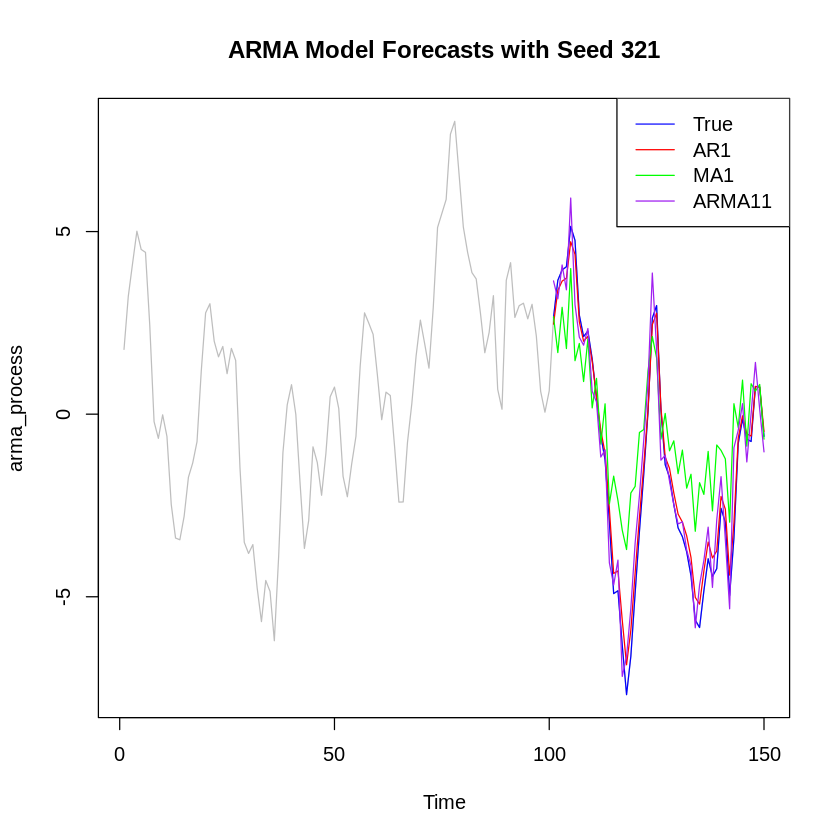

In [4]:

# Perform analysis with a different seed, e.g., 321
perform_analysis(321)

### Discussion

The AR(1) model performs significantly better than MA(1) and ARMA(1,1) models across both seeds in terms of MSE. Both models exhibit higher MSEs compared to the AR(1) model. From the plots, it is evident that the AR(1) model follows the true series more closely than the other models, aligning with the numerical MSE findings. The plots show that MA(1) and ARMA(1,1) diverge more significantly from the true values, particularly in later time points.

### Application Problem

Loading required package: tidyr

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in adf.test(earnings_ts):
“p-value greater than printed p-value”



	Augmented Dickey-Fuller Test

data:  earnings_ts
Dickey-Fuller = 1.9321, Lag order = 4, p-value = 0.99
alternative hypothesis: stationary


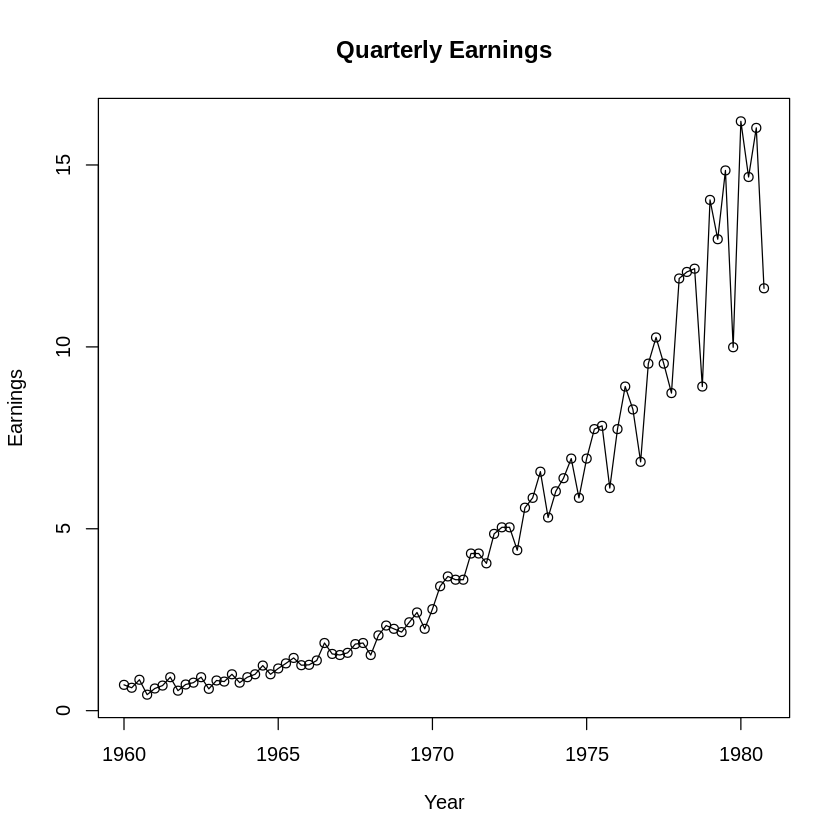

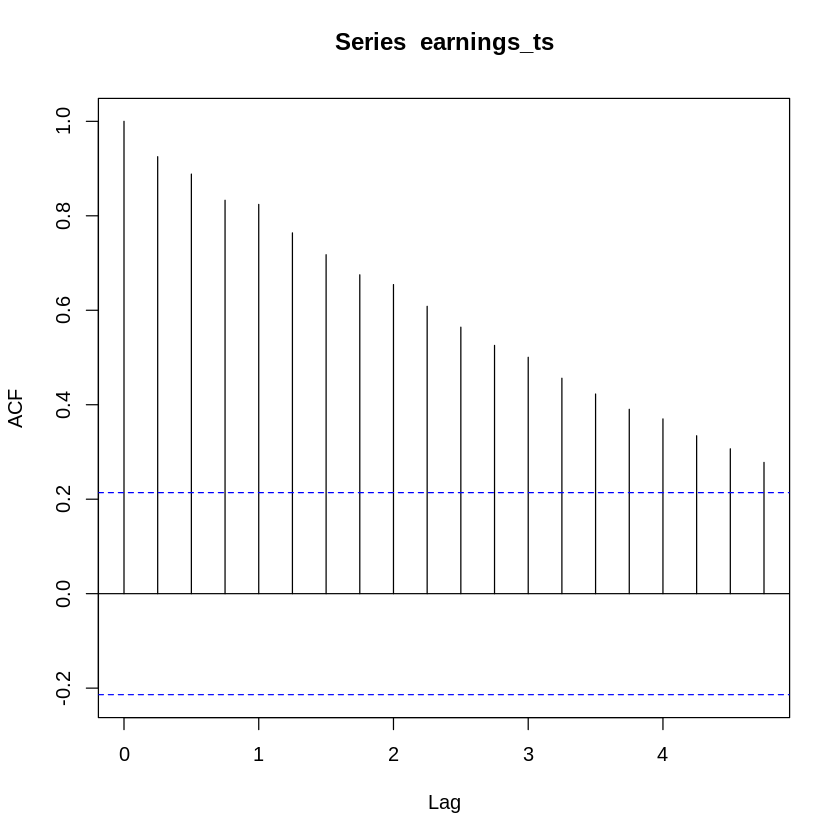

Series: earnings_ts 
ARIMA(3,1,1)(0,1,0)[4] 

Coefficients:
          ar1     ar2     ar3      ma1
      -0.1712  0.1387  -0.208  -0.6636
s.e.   0.1769  0.1701   0.121   0.1542

sigma^2 = 0.1808:  log likelihood = -43.01
AIC=96.02   AICc=96.84   BIC=107.86

Training set error measures:
                    ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.0710546 0.4017401 0.2612646 2.132272 6.297105 0.3723708
                    ACF1
Training set -0.05098975

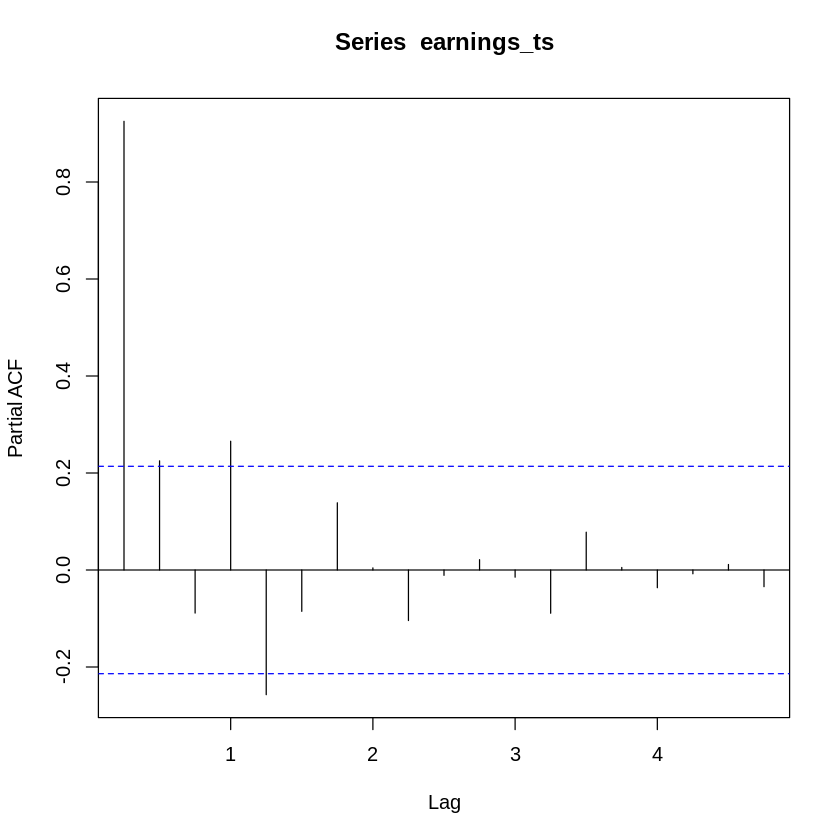


	Ljung-Box test

data:  Residuals from ARIMA(3,1,1)(0,1,0)[4]
Q* = 5.6193, df = 4, p-value = 0.2294

Model df: 4.   Total lags used: 8



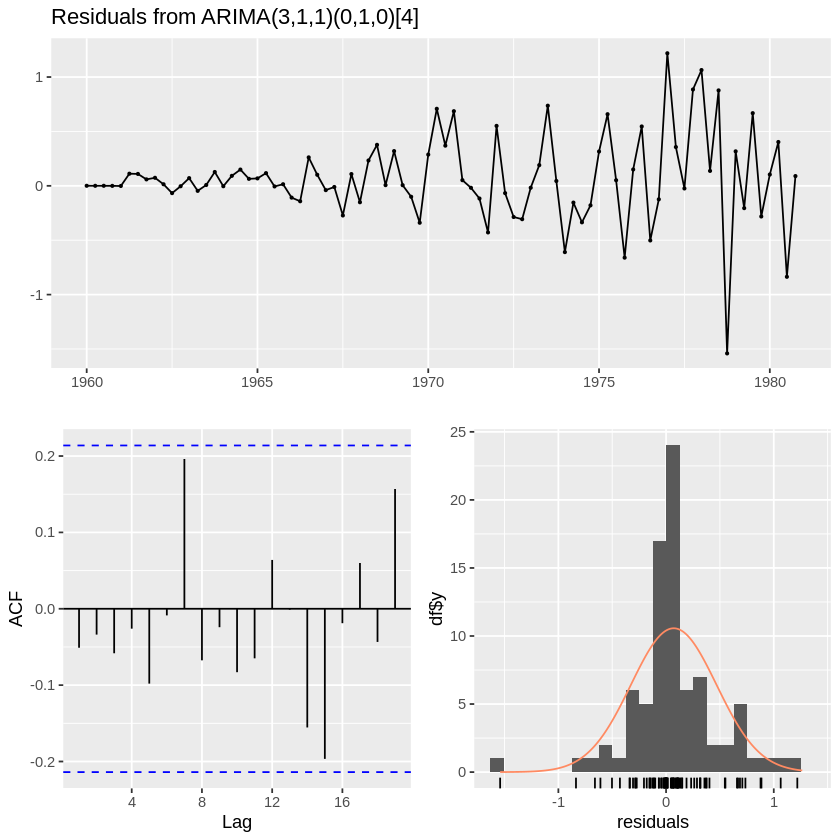

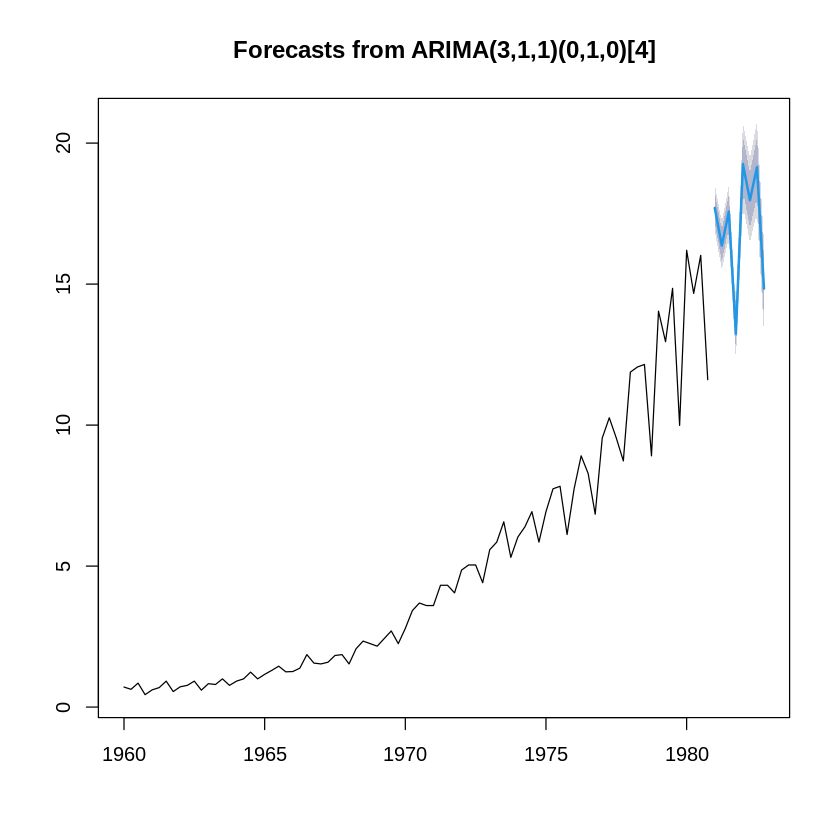

In [8]:
# Install and load required packages
if (!require("forecast")) install.packages("forecast")
if (!require("tseries")) install.packages("tseries")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("tidyr")) install.packages("tidyr")
if (!require("dplyr")) install.packages("dplyr")

library(forecast)
library(tseries)
library(ggplot2)
library(tidyr)
library(dplyr)

# Load data
data <- read.csv("/content/Assignment3_data.csv")

# Pivot data to long format and create a continuous time series
data_long <- pivot_longer(data, cols = -Year, names_to = "Quarter", values_to = "Earnings")

# Ensure the quarters are in correct sequence
data_long <- data_long %>%
  mutate(Quarter = factor(Quarter, levels = c("Qtr1", "Qtr2", "Qtr3", "Qtr4")),
         Time = as.numeric(row_number())) %>%
  arrange(Year, Quarter)

# Convert to ts object assuming quarterly data
earnings_ts <- ts(data_long$Earnings, frequency = 4, start = c(data_long$Year[1], which(levels(data_long$Quarter) == data_long$Quarter[1])))

# Plot the time series
plot(earnings_ts, main = "Quarterly Earnings", xlab = "Year", ylab = "Earnings", type = "o")

# Stationarity test
adf.test(earnings_ts)

# ACF and PACF plots
acf(earnings_ts)
pacf(earnings_ts)

# Fit a simple ARIMA model as a starting point
fit <- auto.arima(earnings_ts)
summary(fit)

# Model diagnostics
checkresiduals(fit)

# Forecasting
future <- forecast(fit, h = 8)  # Forecasting for next two years (8 quarters)
plot(future)


Analysis Summary

  Stationarity: The Augmented Dickey-Fuller test result (p-value = 0.99) suggests that the series is not stationary. This justifies the use of differencing (d = 1) in the ARIMA model.
  ACF and PACF Plots: The plots indicate significant autocorrelation at multiple lags, which informed the selection of an ARIMA(3,1,1) model.
  ARIMA Model Fit: The model parameters and their standard errors indicate a moderately stable model, but the significant negative MA1 term (-0.6636) suggests that this component is quite influential in the model.
  Diagnostic Checks:
        The Ljung-Box test on residuals (p-value = 0.2294) indicates that there is no significant autocorrelation in the residuals, suggesting a good fit of the model.
        The residual plots and histogram show that residuals are fairly well distributed around zero with no obvious patterns, which is good for an ARIMA model.

Forecast Evaluation

The forecast plot shows the historical data and future values predicted by the model with confidence intervals. The model appears to continue the trend observed in the historical data, projecting increasing earnings. This trend follows the historical pattern, but it is crucial to consider economic and industry factors that could impact future earnings when using this forecast practically.

In [9]:
# Fit alternative ARIMA models
fit_arima211 <- auto.arima(earnings_ts, seasonal = FALSE, stepwise = TRUE, approximation = FALSE, trace = TRUE, d = 1, max.order = 5, start.p = 0, start.q = 0, max.p = 2, max.q = 1)
fit_arima111 <- auto.arima(earnings_ts, seasonal = FALSE, stepwise = TRUE, approximation = FALSE, trace = TRUE, d = 1, max.order = 3, start.p = 0, start.q = 0, max.p = 1, max.q = 1)

# Summarize models
summary(fit_arima211)
summary(fit_arima111)

# Compare AIC and BIC of each model
aic_bic_comparison <- data.frame(
  Model = c("ARIMA(3,1,1)", "ARIMA(2,1,1)", "ARIMA(1,1,1)"),
  AIC = c(fit$aic, fit_arima211$aic, fit_arima111$aic),
  BIC = c(fit$bic, fit_arima211$bic, fit_arima111$bic)
)
print(aic_bic_comparison)



 ARIMA(0,1,0)           with drift         : 297.4346
 ARIMA(0,1,0)           with drift         : 297.4346
 ARIMA(1,1,0)           with drift         : 265.2569
 ARIMA(0,1,1)           with drift         : 255.637
 ARIMA(0,1,0)                              : 296.0449
 ARIMA(1,1,1)           with drift         : 251.925
 ARIMA(2,1,1)           with drift         : 253.5268
 ARIMA(2,1,0)           with drift         : 265.2051
 ARIMA(1,1,1)                              : 263.0454

 Best model: ARIMA(1,1,1)           with drift         


 ARIMA(0,1,0)           with drift         : 297.4346
 ARIMA(0,1,0)           with drift         : 297.4346
 ARIMA(1,1,0)           with drift         : 265.2569
 ARIMA(0,1,1)           with drift         : 255.637
 ARIMA(0,1,0)                              : 296.0449
 ARIMA(1,1,1)           with drift         : 251.925
 ARIMA(1,1,1)                              : 263.0454

 Best model: ARIMA(1,1,1)           with drift         



Series: earnings_ts 
ARIMA(1,1,1) with drift 

Coefficients:
          ar1      ma1   drift
      -0.3344  -0.5917  0.1658
s.e.   0.1280   0.0783  0.0358

sigma^2 = 1.128:  log likelihood = -121.71
AIC=251.41   AICc=251.93   BIC=261.09

Training set error measures:
                       ME     RMSE       MAE       MPE    MAPE     MASE
Training set -0.007842821 1.036579 0.7290526 -17.04185 24.6183 1.039092
                    ACF1
Training set -0.03205909

Series: earnings_ts 
ARIMA(1,1,1) with drift 

Coefficients:
          ar1      ma1   drift
      -0.3344  -0.5917  0.1658
s.e.   0.1280   0.0783  0.0358

sigma^2 = 1.128:  log likelihood = -121.71
AIC=251.41   AICc=251.93   BIC=261.09

Training set error measures:
                       ME     RMSE       MAE       MPE    MAPE     MASE
Training set -0.007842821 1.036579 0.7290526 -17.04185 24.6183 1.039092
                    ACF1
Training set -0.03205909

         Model       AIC      BIC
1 ARIMA(3,1,1)  96.01521 107.8625
2 ARIMA(2,1,1) 251.41223 261.0876
3 ARIMA(1,1,1) 251.41223 261.0876


In [13]:
# Load the necessary package
library(forecast)

# Fit a SARIMA model
fit_sarima <- auto.arima(earnings_ts,
                         stepwise = TRUE,
                         approximation = FALSE,
                         trace = TRUE,
                         seasonal = TRUE,    # Enable seasonal components
                         D = 1,              # Seasonal differencing
                         m = 4)              # Frequency of the data (4 for quarterly data)

# Display the summary of the model
summary(fit_sarima)


ERROR: Error in auto.arima(earnings_ts, stepwise = TRUE, approximation = FALSE, : argument 7 matches multiple formal arguments


In [12]:
# Define the training window and forecast horizon
train_length <- length(earnings_ts) - 8  # Leave the last 2 years (8 quarters) for testing
test_length <- 8  # Number of steps to forecast (2 years of quarterly data)

# Set up a vector to store predictions and actuals
actuals <- window(earnings_ts, start=train_length+1)
predictions <- numeric(test_length)

# Rolling forecast
for (i in seq_along(actuals)) {
  train_set <- window(earnings_ts, end=c(train_length + i - 1))
  model <- Arima(train_set, order=c(3,1,1), seasonal=c(0,0,0))
  pred <- forecast(model, h=1)
  predictions[i] <- pred$mean
}

# Calculate mean squared error
mse <- mean((predictions - actuals)^2)
print(paste("Rolling Forecast MSE: ", mse))

# Plot actual vs forecasted
plot(actuals, type="l", col="blue", ylim=range(c(predictions, actuals)), main="Rolling Forecast Comparison")
lines(predictions, type="l", col="red")
legend("topright", legend=c("Actual", "Predicted"), col=c("blue", "red"), lty=1)


Warning message in window.default(x, ...):
“'start' value not changed”


ERROR: Error in window.default(x, ...): 'start' cannot be after 'end'
